# Dimensionality Reduction with PCA and t-SNE on MNIST handwritten digit

Dimensionality is the number of dimensions, features, or variables associated with a sample of data.
Methods are commonly divided into linear and non-linear approaches. Approaches can also be divided into feature selection and feature extraction.

Applications of Dimensionality Reduction:
    1. feature engineering
    2. Noise reduction
    3. Generating plausible artificial datasets
    4. Financial modelling/risk analysis

In [1]:
# Data Set : MNIST handwritten digit classification
url="https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"

The MNIST handwritten digit dataset is one of the most famous image recognition datasets. It consists of square images, 8 x 8 pixels, each containing a single handwritten digit. Thus, the dataset features are an 8 by 8 matrix, containing each pixel's color in grayscale. The target consists of 10 classes, one for each digit from 0 to 9.  32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16.

In [103]:
defaultW <- getOption("warn") # supress warning
options(warn = -1) 

#  install “package” if it doesn’t exist, and then load it.

if (!require(tidyverse)) install.packages('tidyverse')   # data manipulation
library(tidyverse)

if (!require(ggplot2)) install.packages('ggplot2')
library(ggplot2)

if (!require(ggpubr)) library(ggpubr)
theme_set(theme_pubr())   # theme function theme_pubr() [in ggpubr] as the default theme

#if (!require(prcomp)) install.packages("prcomp")
#library(prcomp)

#if (!require(remote)) install.packages("remotes")
#remotes::install_github("vqv/ggbiplot", force = TRUE)
#library(ggbiplot)

if (!require(factoextra)) install.packages("factoextra") # create a ggplot2-based elegant visualization.
library(factoextra)


options(warn = defaultW) # turn on warning

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/

There are two general methods to perform PCA in R :

    Spectral decomposition which examines the covariances / correlations between variables
    Singular value decomposition which examines the covariances / correlations between individuals

The function princomp() uses the spectral decomposition approach. The functions prcomp() and PCA()[FactoMineR] use the singular value decomposition (SVD).

In [21]:
# Load the data and look at first few rows
rawdata <- read.csv(url,header=TRUE, sep=",", as.is=TRUE)
rawdata %>% 
    as_tibble() %>%
    head()

X0,X1,X6,X15,X12,X1.1,X0.1,X0.2,X0.3,X7,...,X0.21,X0.22,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,X0.26
0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
0,0,1,11,13,11,7,0,0,0,...,0,0,0,1,13,5,0,0,0,5


In [22]:
rawdata %>% str()

'data.frame':	3822 obs. of  65 variables:
 $ X0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X6   : int  10 8 0 5 11 1 8 15 3 6 ...
 $ X15  : int  16 15 3 14 16 11 10 2 13 14 ...
 $ X12  : int  6 16 11 4 10 13 8 14 13 14 ...
 $ X1.1 : int  0 13 16 0 1 11 7 13 2 16 ...
 $ X0.1 : int  0 0 0 0 0 7 2 2 0 16 ...
 $ X0.2 : int  0 0 0 0 0 0 0 0 0 8 ...
 $ X0.3 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X7   : int  7 1 0 0 4 0 1 0 6 0 ...
 $ X16  : int  16 11 5 13 16 9 15 16 16 7 ...
 $ X6.1 : int  8 9 16 8 10 14 14 15 12 11 ...
 $ X6.2 : int  16 11 11 0 15 6 12 12 10 8 ...
 $ X10  : int  5 16 13 0 8 4 12 13 8 10 ...
 $ X0.4 : int  0 1 7 0 0 3 4 8 0 15 ...
 $ X0.5 : int  0 0 0 0 0 0 0 0 0 3 ...
 $ X0.6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X8   : int  11 0 3 3 4 0 7 2 9 0 ...
 $ X16.1: int  16 0 15 14 16 16 15 16 15 0 ...
 $ X2   : int  0 0 8 4 3 12 12 12 12 0 ...
 $ X0.7 : int  6 7 1 0 11 16 5 1 16 4 ...
 $ X11  : int  14 14 15 0 13 15 0 6 6 15 ...
 $ X2.1 : int  3 0 6 0 0 2 

In [106]:
# rename the last column as "class"
rawdata %<>%
    dplyr::rename(class=X0.26)  %>%
    mutate(class =as_factor(class))

ERROR: Error: Can't rename columns that don't exist.
x Column `X0.26` doesn't exist.


In [26]:
# rename others features columns
names(rawdata)[1:64] <-paste ("var",1:64,spe="")

In [27]:
# check the column names
colnames(rawdata)

[1] "var 1 "  "var 2 "  "var 3 "  "var 4 "  "var 5 "  "var 6 "  "var 7 " 
 [8] "var 8 "  "var 9 "  "var 10 " "var 11 " "var 12 " "var 13 " "var 14 "
[15] "var 15 " "var 16 " "var 17 " "var 18 " "var 19 " "var 20 " "var 21 "
[22] "var 22 " "var 23 " "var 24 " "var 25 " "var 26 " "var 27 " "var 28 "
[29] "var 29 " "var 30 " "var 31 " "var 32 " "var 33 " "var 34 " "var 35 "
[36] "var 36 " "var 37 " "var 38 " "var 39 " "var 40 " "var 41 " "var 42 "
[43] "var 43 " "var 44 " "var 45 " "var 46 " "var 47 " "var 48 " "var 49 "
[50] "var 50 " "var 51 " "var 52 " "var 53 " "var 54 " "var 55 " "var 56 "
[57] "var 57 " "var 58 " "var 59 " "var 60 " "var 61 " "var 62 " "var 63 "
[64] "var 64 " "class"

In [28]:
rawdata %>%
    pull(class) %>%
    fct_count()

f,n
0,375
1,389
2,380
3,389
4,387
5,376
6,377
7,387
8,380
9,382


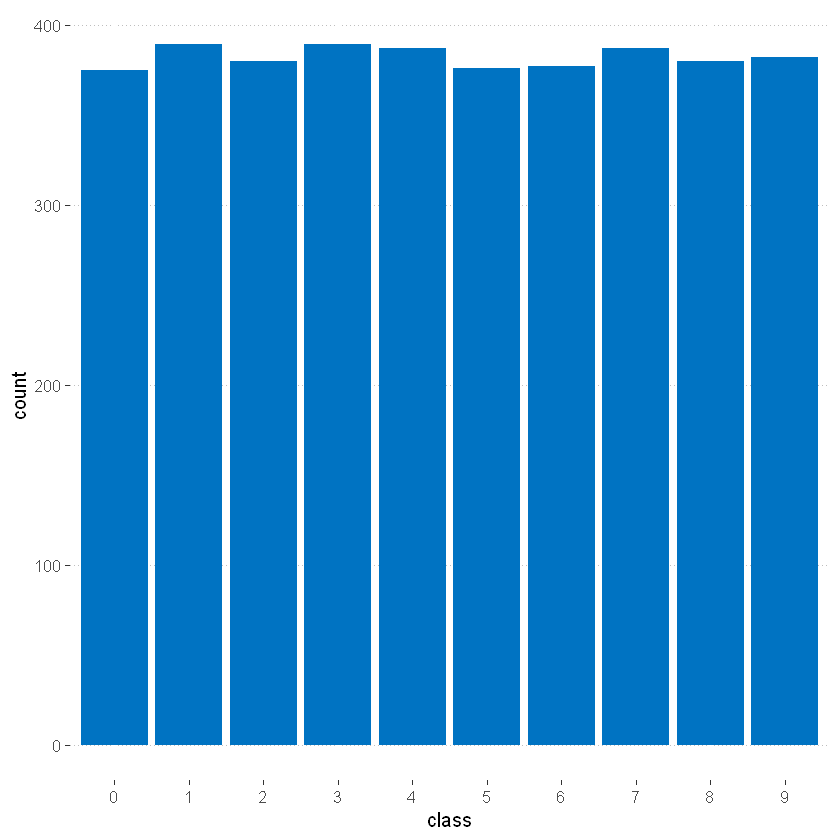

In [29]:
ggplot(rawdata, aes(class)) +
  geom_bar(fill = "#0073C2FF") +
  theme_pubclean()

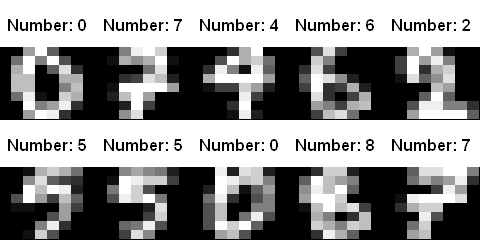

In [30]:
# https://stackoverflow.com/questions/37953644/r-image-plot-mnist-dataset/49483988

library(repr)
# Change plot size to 4 x 2
options(repr.plot.width=4, repr.plot.height=2)

#par(mfcol=c(2,6))
par( mfrow = c(2,5) )  # 2 rows, 5 image per row
par(mar=c(0, 0, 3, 0) , xaxt='n', yaxt='n')  # leave some spaces on margin 3 for labeling and Remove both axis

#Function to visualize a number
img <- function(data, row_index){

#Obtaining the row as a numeric vector
r <- as.numeric(data[row_index, 1:64])

#Creating a empty matrix to use
im <- matrix(nrow = 8, ncol = 8)

#Filling properly the data into the matrix
j <- 1
for(i in 8:1){
  im[,i] <- r[j:(j+7)]
  j <- j+8
}  

#Plotting the image with the label
image(#x = 1:8, 
      #y = 1:8, 
      z = im, 
      col=gray((0:32)/32), 
      main = paste("Number:", data$class[row_index]))
}

# display first 10 images 
for (idx in 1:10) { 
    img(rawdata, idx)
    }

### Splitting the Data-Set into Training Set and Test Set

In [31]:
trn <- rawdata %>% 
    sample_frac(0.8)

sid<-as.numeric(rownames(trn)) # because rownames() returns character

tst <- rawdata[-sid,]

In [32]:
# traning set
X_trn <- trn %>%  # features
    select (-class) 
y_trn <- trn %>% # target
    select (class)

# testing set
X_tst <- tst %>%  # features
    select (-class)
y_tst <- tst %>% # target
    select (class) 

## PRINCIPAL COMPONENT ANALYSIS

https://medium.com/@TheDataGyan/dimensionality-reduction-with-pca-and-t-sne-in-r-2715683819

Applications of PCA:

    Neuroscience
    Business analytics
    Any data analytics project which has linear data.

Disadvantages of PCA:

    1. PCA produces only rotational transformation of data
    2. It is not suitable for non linear data.

In [33]:
# prcomp and ggbiplot libraries not working for R version 3.6.1

defaultW <- getOption("warn") # supress warning
options(warn = -1) 

if (!require(ggfortify)) install.packages("ggfortify")
library(ggfortify)

options(warn = defaultW) # turn on warning

package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unknown\AppData\Local\Temp\RtmpqMm7rp\downloaded_packages


Warning message:
"package 'ggfortify' was built under R version 3.6.3"
Attaching package: 'ggfortify'

The following object is masked from 'package:ggbiplot':

    ggbiplot



In [34]:
pc2 <- trn %>%
    select(-class) %>% prcomp(center = TRUE, scale. = FALSE)

In [35]:
summary(pc2)

Importance of components:
                           PC1     PC2     PC3      PC4     PC5     PC6     PC7
Standard deviation     13.4682 12.7234 11.8148 10.08989 8.26484 7.77430 7.45338
Proportion of Variance  0.1507  0.1345  0.1160  0.08459 0.05676 0.05022 0.04616
Cumulative Proportion   0.1507  0.2852  0.4012  0.48580 0.54256 0.59278 0.63894
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     6.68922 6.46860 6.12080 5.38895 5.14685 4.76443 4.33225
Proportion of Variance 0.03718 0.03477 0.03113 0.02413 0.02201 0.01886 0.01559
Cumulative Proportion  0.67611 0.71088 0.74201 0.76614 0.78815 0.80701 0.82261
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     4.1637 4.08422 3.88184 3.72910 3.44424 3.38791 3.33346
Proportion of Variance 0.0144 0.01386 0.01252 0.01155 0.00986 0.00954 0.00923
Cumulative Proportion  0.8370 0.85087 0.86339 0.87495 0.88480 0.89434 0.90357
                          

Warning message:
"`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

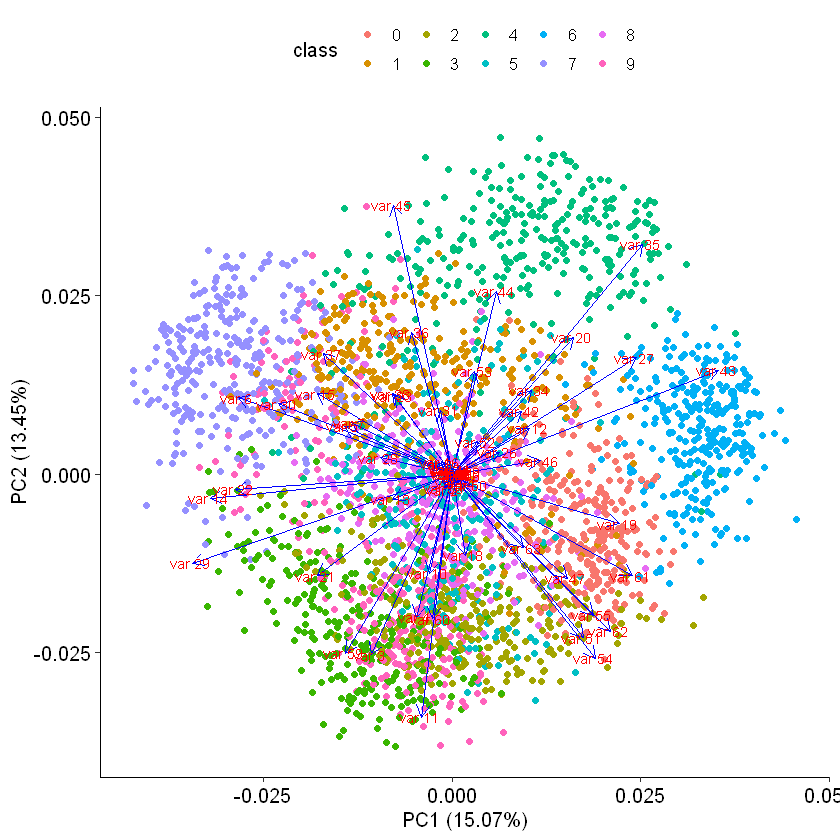

In [37]:
# https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html
# http://rstudio-pubs-static.s3.amazonaws.com/53162_cd16ee63c24747459ccd180f69f07810.html

options(repr.plot.width=7, repr.plot.height=7)

autoplot(pc2, data = trn, colour = 'class',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)

In [61]:
# Variability of each principal component: pr.var
pca.var = pc2$sdev^2
# Variance explained by each principal component: pve
pca.ve = pca.var/sum(pca.var)

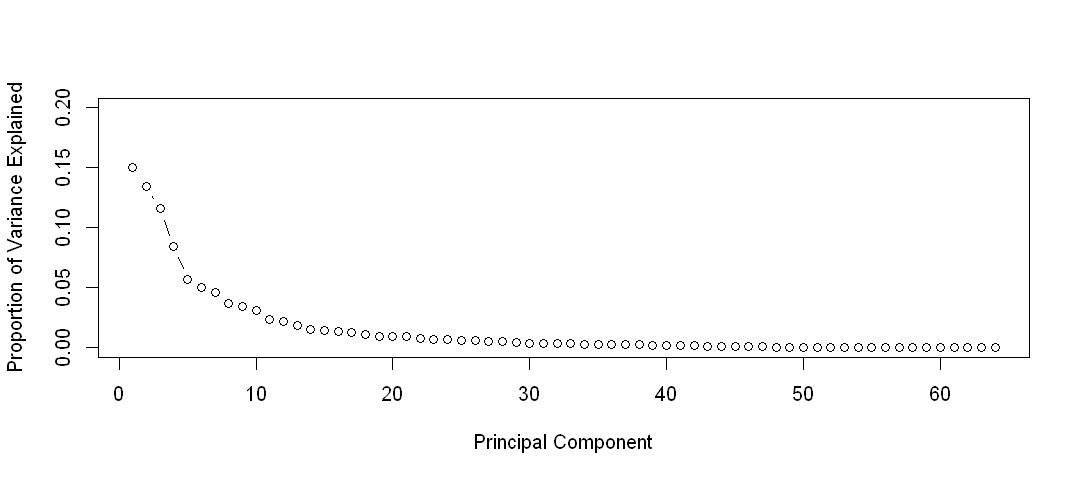

In [58]:
# https://rstudio-pubs-static.s3.amazonaws.com/443642_a2d0590500274bbbb18ef7e81934ff8a.html

# Plot variance explained for each principal component
plot(pca.ve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, .2), type = "b")

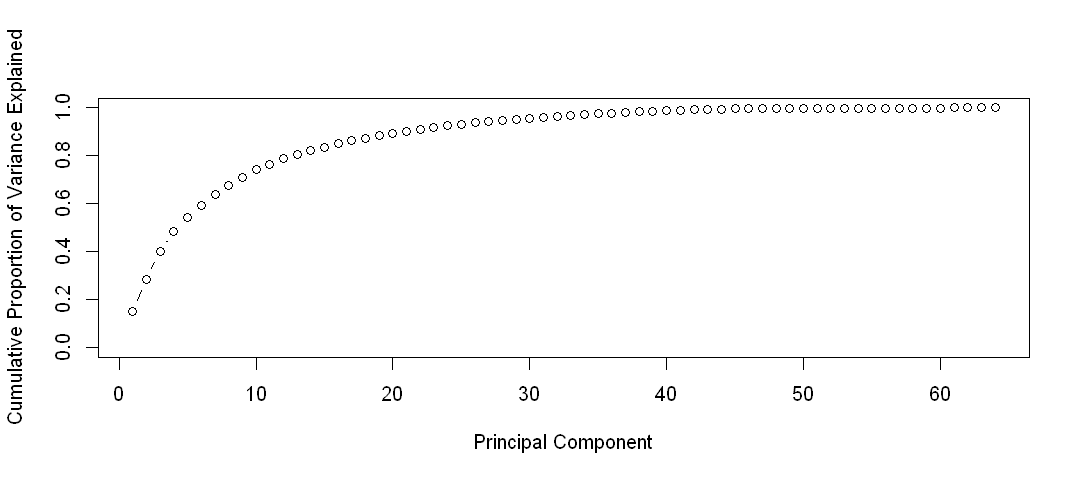

In [60]:
# https://rstudio-pubs-static.s3.amazonaws.com/443642_a2d0590500274bbbb18ef7e81934ff8a.html
# Plot cumulative proportion of variance explained
plot(cumsum(pca.ve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

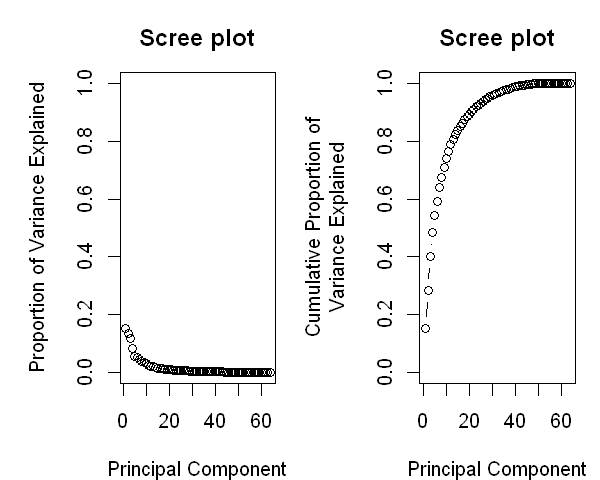

In [52]:
# https://www.geo.fu-berlin.de/en/v/soga/Geodata-analysis/Principal-Component-Analysis/PCA-an-example/Principal-Component-Analysis/index.html
# Scree plot

options(repr.plot.width=5, repr.plot.height=4)

par(mfrow = c(1,2), mar = c(4,5,3,1))

plot(pca.ve,
     xlab = "Principal Component",
     ylab = "Proportion of Variance Explained", 
     ylim = c(0,1), 
     type = 'b',
     main = 'Scree plot')

plot(cumsum(pca.ve), 
     xlab = "Principal Component", 
     ylab = "Cumulative Proportion of\nVariance Explained", 
     ylim = c(0,1),
     type = 'b',
     main = 'Scree plot')

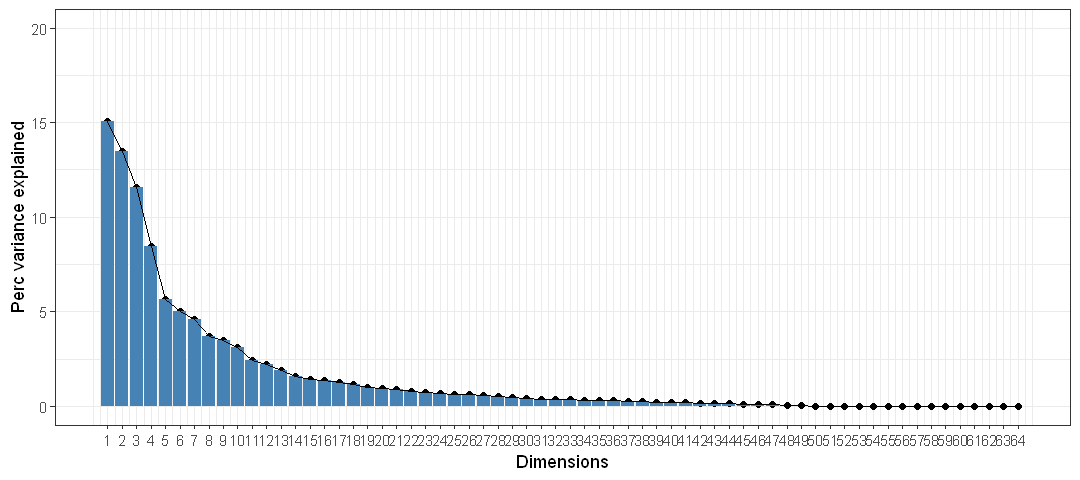

In [56]:
options(repr.plot.width=9, repr.plot.height=4)

# https://stackoverflow.com/questions/60957020/how-to-set-scree-plot-scale-as-same-as-principal-components
# variance explained
varExp = (100*pc2$sdev^2)/sum(pc2$sdev^2)
varDF = data.frame(Dimensions=1:length(varExp),
varExp=varExp)

ggplot(varDF,aes(x=Dimensions,y=varExp)) + geom_point() + 
geom_col(fill="steelblue") + geom_line() + 
theme_bw() + scale_x_continuous(breaks=1:nrow(varDF)) + 
ylim(c(0,20)) + ylab("Perc variance explained")

## t-Distributed Stochastic Neighbour Embedding

https://medium.com/@TheDataGyan/dimensionality-reduction-with-pca-and-t-sne-in-r-2715683819

Applications of t-SNE:

    Facial expression recognition
    Medical Imaging
    Word vectors

Disadvantages of t-SNE:

As this algorithm finds similarity between pairs of points, it has high time(quadratic) and space complexity as that of size of data.

In [62]:
defaultW <- getOption("warn") # supress warning
options(warn = -1) 

if (!require(Rtsne)) install.packages("Rtsne")
library(Rtsne)

options(warn = defaultW) # turn on warning

Loading required package: Rtsne


package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unknown\AppData\Local\Temp\RtmpqMm7rp\downloaded_packages


In [82]:
tsne <- trn %>%
    select(-class) %>%
    Rtsne(
    perlexity=50,
    verbose=TRUE,
    max_iter=500
    )

Performing PCA
Read the 3058 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.94 seconds (sparsity = 0.038339)!
Learning embedding...
Iteration 50: error is 82.117575 (50 iterations in 0.51 seconds)
Iteration 100: error is 67.988388 (50 iterations in 0.48 seconds)
Iteration 150: error is 65.876294 (50 iterations in 0.56 seconds)
Iteration 200: error is 65.142671 (50 iterations in 0.52 seconds)
Iteration 250: error is 64.840233 (50 iterations in 0.49 seconds)
Iteration 300: error is 1.760201 (50 iterations in 0.45 seconds)
Iteration 350: error is 1.432536 (50 iterations in 0.42 seconds)
Iteration 400: error is 1.281647 (50 iterations in 0.47 seconds)
Iteration 450: error is 1.200833 (50 iterations in 0.43 seconds)
Iteration 500: error is 1.156057 (50 iterations in 0.46 seconds)
Fitting performed in 4.78 seconds.


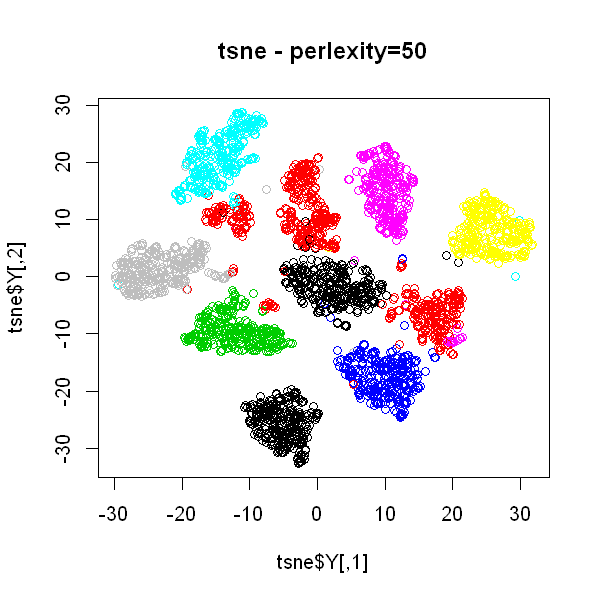

In [93]:
options(repr.plot.width=5, repr.plot.height=5)

plot(tsne$Y, col=trn$class, main="tsne - perlexity=50")

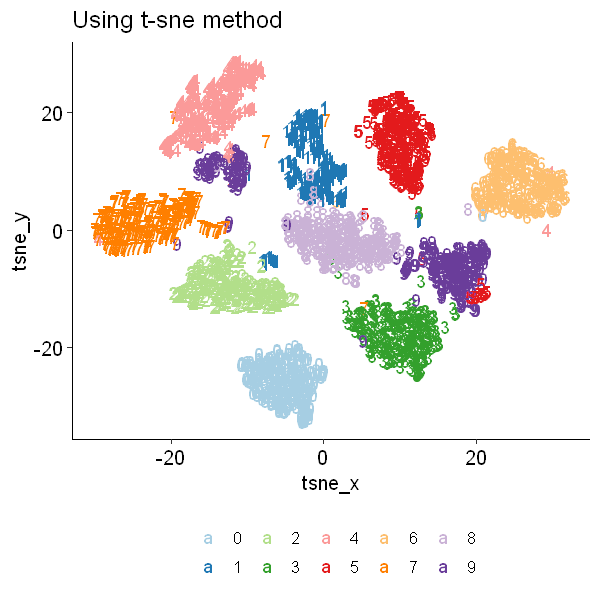

In [121]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_10590/slides/chapter2.pdf

tsne_plot <- data.frame(tsne_x= tsne$Y[,1], 
                        tsne_y = tsne$Y[,2],
                        digit = as.factor(trn$class))


ggplot(tsne_plot, aes(x= tsne_x, y = tsne_y, color = digit)) +
    scale_color_brewer(palette="Paired") +
    ggtitle("Using t-sne method") +
    geom_text(aes(label = digit)) + #theme(legend.position="none") +
        # Change legend position using text options
   theme(legend.title = element_blank(), legend.position = "bottom")

Further reading:

http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f
https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/